# Assignment Chapter 3 - Machine Learning


## Assignment Outcomes
Participants can understand about machine learning and its applications.
Participants are able to understand the concept of machine learning (supervised and unsupervised) and is able to perform various machine learning models in solving a data science problem.
Participants are able to decipher insights and decide the feature importance from models that they created.
Participants are able to understand the concept of machine learning (supervised and unsupervised) and is able to perform various machine learning models in solving a data science problem.
Participants are able to boost their model evaluation through hyperparameter tuning & bootstrapping.
Participants are able to use metric evaluation for supervised learning to diagnose supervised learning model performance.

## Questions
Berdasarkan dataset yang telah kalian pilih pada Assignment 2:
1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.
4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.
6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

# Penyelesaian Assignment

Sebelumnya telah dipilih dataset yang digunakan yaitu dataset `Housing Price`. Dataset tersebut merupakan dataset yang digunakan untuk kasus Regression karena memiliki data target bertipe numerik (continuous). Maka dari itu, di sini akan dilakukan proses Regression dengan dataset tersebut menggunakan algoritma untuk kasus Regression. Sebagai algoritma utama, di sini akan menggunakan algoritma K-Neighbors Regressor karena algoritma ini mudah digunakan, cara kerjanya mudah dipahami (memprediksi nilai target dengan cara melihat jarak data dengan tetangga terdekat), dan waktu perhitungannya relatif cepat. Selain algoritma utama, disini juga akan digunakan dua algoritma lain yaitu Linear Regression dan Random Forest Regressor sebagai algoritma untuk hyperparameter tuning. Beberapa hal yang akan dilakukan adalah:
- Import Modules dan Load Dataset
- Data Preprocessing
- Modelling dengan Linear Regression
- Mengevaluasi Performa Model
- Upaya Meningkatkan Performa Model
- Mengevaluasi Kemabli Performa Model

## Import Modules dan Load Dataset

Hal pertama yang akan dilakukan adalah meng-import beberapa modules dan me-load dataset yang akan digunakan.

Beberapa modules yang akan digunakan adalah:
- pandas, untuk me-load dan mengolah dataset
- numpy, untuk melakukan operasi matematika dan transformasi data
- seaborn & pyplot, untuk melakukan visualisasi data
- LabelEncoder, untuk melakukan encoding terhadap data kategorik
- MinMaxScaler, untuk melakukan normalization terhadap data numerik
- train_test_split, untuk memisahkan dataset menjadi training dan testing data
- LinearRegression, sebagai algoritma utama untuk melakukan proses Regression
- KNeighborsRegressor & RandomForestRegressor sebagai algoritma untuk hyperparameter tuning
- cross_val_score, ntuk melakukan cross validation
- mean_absolute_error & accuracy_score, sebagai media untuk melakukan evaluasi performa model
- GridSearchCV & Pipeline, untuk melakukan hyperparameter tuning

In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

Sedangkan dataset yang akan digunakan adalah `Dataset Housing Price` yang sebelumnya telah digunakan untuk Data Preprocessing. Kolom `Id` pada dataset tidak akan digunakan dalam proses Regression, sehingga kolom tersebut akan dibuang (dropped). Dataset akan di-load menggunakan pandas dengan variable `df` dan akan dibuat dataset backup dengan variable `df_backup`.

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/rizzzmaooo05/my-portofolio/main/msib-startup-campus/dataset/housing-price/train.csv")
df.drop(columns = 'Id', inplace = True)

df_backup = df.copy(deep = True)

Untuk melihat sekilas dataset yang digunakan, jalankan perintah di bawah ini.

In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing

Proses selanjutnya yaitu data preprocessing. Dataset yang telah di-load perlu melalui serangkaian proses terlebih dahulu sebelum digunakan untuk proses Regression. Serangkaian proses yang akan dilakukan adalah:
- Deteksi dan Handle Missing Values
- Deteksi dan Handle Outlier
- Deteksi dan Handle Duplicated Data
- Encoding Data Kategorik
- Normalization Data Numerik
- Splitting Training dan Testing Data

### Deteksi dan Handling Missing Values

Tahap pertama yang perlu dilakukan adalah melakukan deteksi atau pengecekkan dan peng-handle-an missing values terhadap dataset. Missing values perlu dihandle karena dapat berpengaruh terhadap performa model Machine Learning. Missing Values dapat dihandle dalam dua cara, yaitu dengan membuang kolom yang mengandung missing values (dropping) atau mengisi kolom kolom yang mengandung missing values dengan teknik tertentu (imputation).


Pertama-tama jalankan `df.info()`.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Dapat terlihat bahwa jumlah entri data dalam dataset tersebut adalah 1460, namun terdapat beberapa kolom yang jumlah entri data-nya kurang dari 1460. Ini menandakan adanya missing values pada beberapa kolom. Missing values ini akan dihandle di proses selanjutnya di bawah ini.

Missing values perlu dihandle karena dapat berpengaruh terhadap performa model Machine Learning. Missing Values dapat dihandle dalam dua cara, yaitu dengan membuang kolom yang mengandung missing values (dropping) atau mengisi kolom kolom yang mengandung missing values dengan teknik tertentu (imputation).

Terlihat bahwa terdapat kolom yang mengandung missing values. Seperti yang sempat disinggung di atas, cara meng-handle missing values ada dua, yaitu dropping dan imputation. Kedua cara tersebut digunakan untuk kondisi yang berbeda.

Agar suatu features dalam dataset dapat digunakan untuk Machine Learning, features tersebut haruslah memiliki nilai, tidak kosong. Dari informasi yang didapat dari mengeksekusi `df.info()` nampak bahwa beberapa features hanya sedikit mengandung missing values, features ini masih mungkin untuk digunakan dengan cara imputation. Namun, ada juga beberapa features yang mengandung missing values yang sangat ekstrem, features ini sebaiknya di-handle dengan dropping.

Misalnya di sini diterapkan syarat ambang batas agar suatu features dapat digunakan untuk proses selanjutnya, yaitu mengandung missing values kurang dari 20% dri keseluruhan data (sekitar 292 data). Features yang tidak memenuhi syarat ambang batas akan didrop. Untuk melakukan proses tersebut, dapat mengeksekusi perintah berikut ini.

In [38]:
for col in df.columns:
  if df[col].isna().sum() >= 0.2 * df.shape[0]:
    df.drop(columns = col, inplace = True)

Setelah dilakukan proses dropping features, features yang tersisa dapat dicek dengan mengeksekusi `df.shape[1]`.

In [39]:
df.shape[1]

75

Terlihat features yang tersisa yaitu 74. Selanjutnya features yang masih mengandung missing values akan di-impute.
- Untuk data numerik, terdapat beberapa teknik imputation, salah satunya adalah teknik interpolate. Kelebihan teknik ini adalah nilai yang dihasilkan tidak seragam dan bergantung pada data sebelum atau sesudahnya, sehingga distribusi data bisa lebih merata, tidak bertumpuk pada suatu nilai.
- Untuk data kategorik, akan di-impute dengan menggunakan modus (mode).

Untuk melakukannya dapat mengeksekusi perintah berikut ini.


In [40]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond']).columns
cat_cols = df.drop(columns = num_cols).columns

# imputation for categorical data
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

# imputation for numerical data
for col in num_cols:
  df[col] = df[col].fillna(df[col].interpolate())

Dengan ini, proses handling missing values telah selesai. Untuk mengcek apakah proses handling ini berhasil, jalankan kembali `df.info()`.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Terlihat bahwa seluruh features sudah tidak mengandung missing values yang menandakan bahwa proses handling terhadap missing values telah berhasil.

### Deteksi dan Handle Outlier

Data outlier perlu dihandle karena dapat berpengaruh buruk terhadap performa model Regression. Deteksi dan peng-handle-an terhadap data outlier hanya dilakukan untuk data numerik. Pada dataset yang digunakan, terdapat beberapa data kategorik yang telah di-encode menjadi numerik, yaitu kolom `MSSubClass`, `OverallQual`, dan `OverallCond`. Kolom tersebut tidak akan disertakan dalam proses peng-handle-an outlier. Peng-handle-an data outlier dilakukan dengan cara mengganti data outlier dengan suatu nilai tertentu.

Untuk melakukan deteksi terhadap outlier, dapat dilakukan dengan cara mem-plot data numerik ke dalam boxplot. Data outlier akan terlihat sebagai titik-titik pada boxplot. Untuk melakukannya dapat dengan mengeksekusi perintah berikut ini.

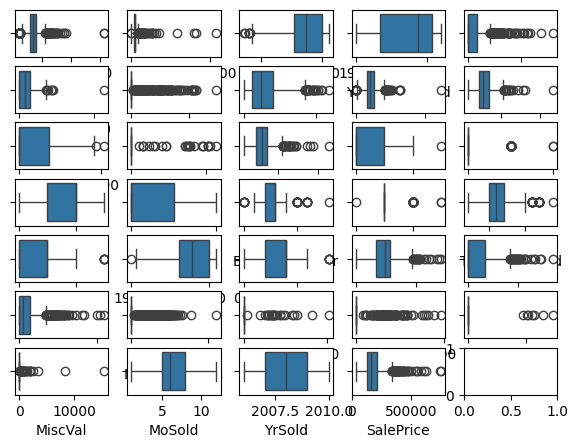

In [42]:
fig, ax = plt.subplots(7, 5, figsize = (7, 5))
for col, ax in zip([col for col in df.columns if col in num_cols], ax.flatten()):
    sb.boxplot(data = df, x = col, ax = ax, )

Terlihat bahwa terdapat titik-titik pada boxplot di beberapa kolom. Artinya data yang digunakan telah belum bebas dari data outlier. Maka perlu dilakukan peng-handle-an terhadap data outlier. Peng-handle-an dapat dilakukan dengan Inter Quartile Range (IQR).
- Batas bawah data adalah Q1 - 1.5 * IQR, data dengan nilai di bawah batas bawah tersebut akan diganti dengan nilai batas bawah.
- Batas atas data adalah Q3 + 1.5 * IQR, data dengan nilai di atas batas atas tersebut akan diganti dengan nilai batas atas.

Untuk melakukannya, dapat mengeksekusi perintah berikut ini:

In [43]:
for col in [col for col in df.columns if col in num_cols]:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5  * iqr
    upper = q3 + 1.5  * iqr
    for i in range(len(df[col])):
        if df[col][i] < lower:
            df[col][i] = lower
        elif df[col][i] > upper:
            df[col][i] = upper

<ipython-input-43-8c650ab8bdcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper
<ipython-input-43-8c650ab8bdcd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower


Untuk mengcek apakah proses handling terhadap outlier berhasil dilakukan, jalankan perintah di bawah ini.

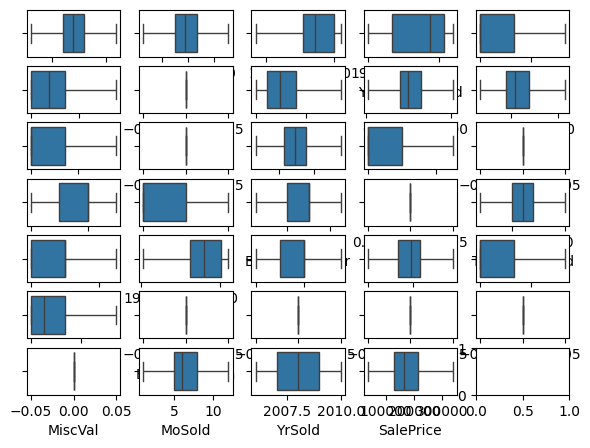

In [44]:
fig, ax = plt.subplots(7, 5, figsize = (7, 5))
for col, ax in zip(df_backup.drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond']).select_dtypes(['int', 'float']).columns, ax.flatten()):
    sb.boxplot(data = df, x = col, ax = ax, )

### Deteksi dan Handle Duplicated Data

Duplicated data juga dapat berpengaruh buruk terhadap performa model Regression sehingga perlu dihandle. Peng-handle-an terhadap duplicated data dilakukan dengan cara membuang baris yang terindikasi sebagai duplicated data.

Untuk melakukan deteksi terhadap duplicated data, dapat mengeksekusi perintah berikut ini.

In [45]:
df.duplicated().value_counts()

False    1460
dtype: int64

Index `False` di atas menyatakan jumlah baris yang tidak terindikasi sebagai duplicated data. Dalam kasus ini, tidak diperlukan peng-handle-an duplicated data.

### Encoding Data Kategorik

Algoritma Machine Learning hanya dapat memproses data yang bertipe numerik. Oleh karena itu, data dengan tipe kategorik harus dilakukan proses encoding terlebih dahulu untuk mengubah tipe data kategorik tersebut menjadi numerik.

Pada kesempatan ini, data kategorik akan diencode dengan Label Encoder. Untuk melakukannya dapat mengeksekusi perintah di bawah ini.

In [46]:
encoder = LabelEncoder()
for col in [col for col in df.drop(columns = 'SalePrice').columns if col in cat_cols]:
    df[col] = encoder.fit_transform(df[col])

Untuk melihat apakah proses encoding berhasil, jalankan perintah berikut ini.

In [47]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450.0,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,0,3,80.0,9600.0,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,5,3,68.0,11250.0,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,6,3,60.0,9550.0,1,0,3,0,0,0,...,0,0,0,0,0,2,2006,8,0,140000.0
4,5,3,84.0,14260.0,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000.0


### Splitting Training dan Testing Data

Untuk melakukan proses Regression, sebuah data harus dipecah menjadi dua, yaitu training data dan testing data. Training data digunakan untuk melatih model Regression agar dapat melakukan prediksi terhadap data lain. Testing data digunakan untuk menguji dan mengevaluasi performa model Regression.

Untuk melakukan proses ini, dapat menjalankan perintah di bawah ini.

In [48]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

## Modelling dengan K-Neighbors Regressor

Di sinilah proses Regression dimulai. Model yang akan digunakan adalah K-Neighbors Regressor. Model akan dilatih menggunakan training data dan diuji serta dievaluasi menggunakan testing data.

Proses modelling dapat dilakukan dengan mengeksekusi perintah di bawah ini.

In [49]:
model_1 = KNeighborsRegressor()
model_1.fit(X_train, y_train)

KNeighborsRegressor()

Tampilan di atas mengindikasikan proses modelling telah berhasil dilakukan. Model yang digunakan disimpan dalam variable `model_1`.

## Evaluasi Performa Model

Setelah dilakukan proses modelling, selanjutnya model tersebut harus diukur dan dievaluasi performanya. Hal tersebut dilakukan agar memperoleh informasi terkait seberapa baik model sebelum digunakan untuk melakukan prediksi terhadap data lain. Di sini akan dilakukan beberapa hal untuk mengukur dan mengevaluasi performa model, di antaranya adalah:
- Cross Validation
- Learning Curves
- Evaluasi dengan Mean Absolute Error (MAE)
- Evaluasi dengan Coefficient of Determination ($R^2$ Score)

### Cross Validation

Sebelumnya telah dilakukan data splitting yang membagi data menjadi training data dan testing data. Data tersebut digunakan untuk fitting model dan model tersebut sudah dapat diukur performanya dan digunakan untuk melakukan prediksi terhadap data lain.

Namun proses splitting data di atas hanya dilakukan sekali saja sehingga walaupun performa suatu model sudah terbilang cukup baik, bisa jadi performa yang cukup baik tersebut masih dipengaruhi efek kebetulan. Agar performa model dapat lebih dipercayai, maka perlu dilakukan Cross Validation. Cross validation merupakan proses statistik dimana model akan dilatih dengan kombinasi training data dan score hasil latihan ini akan di rata-rata sehingga performa model lebih dapat dipercaya dan meminimalisir efek kebetulan.

Untuk mengukur performa model sebelum dilakukan Cross Validation, dapat menjalankan perintah berikut ini.

In [50]:
model_1.score(X_train, y_train)

0.8122573815492782

Terlihat bahwa performa model sekitar 0.81 atau 81%. Apakah performa model tersebut dipengaruhi efek kebetulan? Untuk mengetahuinya, harus dilakukan proses Cross Validation. Misalnya di sini akan dilakukan proses Cross Validation sebanyak 3 kali (3-Fold Cross Validation), nilai performa model dari proses Cross Validation akan diambil rata-ratanya, kemudian hasil tersebut akan dibandingkan dengan nilai performa model sebelum dilakukan proses Cross Validation. Untuk melakukannya, dapat mengeksekusi perintah di bawah ini.

In [51]:
cross_val_score(model_1, X_train, y_train, cv = 3).mean()

0.6799344213401656

Terlihat bahwa nilai performa model hasil 3-Fold Cross Validation sekitar 0.68 atau 68%. Hasil ini berbeda dan memiliki selisih sekitar 13%. Hal ini mengindikasikan bahwa performa model sebelum dilakukan proses Cross Validation masih dipengaruhi efek kebetulan. Performa model hasil Cross Validation lebih merepresentasikan performa model yang sebenarnya.

### Learning Curves

Learning curves dalam machine learning merupakan gambaran dari performa model yang dilihat dari nilai akurasi atau kesalahan (error) dari data training dan data testing seiring dengan jumlah data atau iterasi yang dilakukan. Learning curves dapat diinterpretasikan dengan 3 tipe, yaitu:
- Good Fit adalah keadaan di mana performa model sangat baik, baik saat diuji dengan training data maupun testing data. Model dengan tipe inilah yang diinginkan.
- Over Fit adalah keadaan di mana performa suatu model sangat bagus saat diuji dengan training data, namun performa model turun dengan signifikan ketika diuji dengan testing data. Overfitting dapat dianalogikan seperti saat ada suatu ujian hanya menghapal soal, bukan memahami, sehingga performa dalam mengerjakan soal-soal yang telah dihapal sangat bagus, namun performa saat diuji dengan soal ujian yang sesungguhnya turun drastis.
- Under Fit adalah keadaan di mana performa suatu model sangat jelek saat diuji dengan training data, sehingga tidak dapat digunakan untuk melakukan generalisasi terhadap data lain. Underfitting dapat dianalogikan seperti saat ada suatu ujian tidak belajar sehingga saat ujian tidak dapat mengerjakan.

Over Fit dan Under Fit perlu dihindari karena tentunya model yang diinginkan adalah model yang memiliki performa bagus (Good Fit) sehingga dapat digunakan untuk melakukan generalisasi pada data lain.

Untuk melakukan visualisasi terhadap learning curves, dapat mengeksekusi perintah di bawah ini.

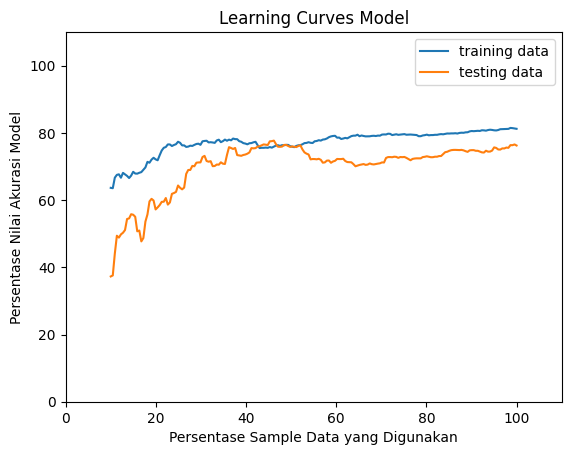

In [87]:
persentase_jumlah_data = np.linspace(0.1, 1, 200)

learning_curves_train = []
learning_curves_test  = []

for persentase in persentase_jumlah_data:
    X_train_subset = X_train[0 : int(len(X_train) * persentase)]
    y_train_subset = y_train[0 : int(len(y_train) * persentase)]

    X_test_subset = X_test[0 : int(len(X_test) * persentase)]
    y_test_subset = y_test[0 : int(len(y_test) * persentase)]

    model_1.fit(X_train_subset, y_train_subset)

    score = model_1.score(X_train_subset, y_train_subset)
    learning_curves_train.append(score)

    score = model_1.score(X_test_subset, y_test_subset)
    learning_curves_test.append(score)

plt.plot(persentase_jumlah_data * 100, np.array(learning_curves_train) * 100, label = 'training data')
plt.plot(persentase_jumlah_data * 100, np.array(learning_curves_test) * 100, label = 'testing data')
plt.legend()
plt.xlabel('Persentase Sample Data yang Digunakan')
plt.ylabel('Persentase Nilai Akurasi Model')
plt.title('Learning Curves Model')
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.show()

Terlihat bahwa seiring dengan banyaknya sample data yang digunakan, learning curves dari training data dan testing data semakin berdekatan dengan akurasi berkisar di angka 80%. Ini mengindikasikan bahwa model yang digunakan mendekati Good Fit.

### Evaluasi dengan Mean Absolute Error (MAE)

Terdapat beberapa metrik evaluasi yang digunakan untuk mengevaluasi performa model, salah satunya yaitu Mean Absolute Error (MAE). Sebagus apapun model yang digunakan, selalu ada selisih nilai antara nilai sebenarnya (actual value) dengan nilai hasil prediksi model (prediction value). Selisih tersebut disebut dengan error. Pada MAE, error pada setiap data akan diambil nilai absolutnya, kemudian dihitung rata-rata dari semua nilai absolut errornya, dapat dirumuskan dengan:

$MAE=\frac {\sum^n_{i = 1} |y_{actual} - y_{prediction}|} {n}$

Evaluasi model dengan MAE memberikan penjelasan mengenai performa model yang cukup mudah dipahami (nilai MAE adalah rata-rata selisih antara actual data dengan prediction data). Semakin kecil nilai MAE mengindikasikan performa model yang semakin baik.

Untuk melakukan evaluasi dengan MAE, dapat menjalankan perintah di bawah ini.

In [53]:
y_pred = model_1.predict(X_test)
mean_absolute_error(y_test, y_pred)

24785.073630136987

Didapat nilai MAE sekitar 24800. Dapat diinterpretasikan dengan "Secara rata-rata, nilai `SalePrice` hasil prediksi memiliki selisih (error) terhadap nilai sebenarnya sebesar kurang lebih 24800".

### Evaluasi dengan Coefficient of Determination ($R^2$ Score)

Selain MAE, terdapat juga metrik evaluasi lain yaitu $R^2$ Score. Metrik evaluasi ini akan mengukur seberapa baik suatu model untuk memprediksi nilai sebenarnya dari suatu data. $R^2$ Score dinyatakan dalam bilangan desimal atau dapat juga dinyatakan dalam peresentasi sehingga kesimpulan dari evaluasi dengan metrik ini bisa langsung dipahami. $R^2$ Score yang semakin mendekati 1 atau 100% mengindikasikan model yang baik.

Untuk melakukan evaluasi dengan $R^2$ Score, dapat menjalankan perintah di bawah ini.

In [54]:
y_pred = model_1.predict(X_test)
r2_score(y_test, y_pred)

0.7625769145543062

Didapat nilai $R^2$ Score adalah sekitar 0.76 atau 76%. Dapat diinterpretasikan dengan "Model mampu melakukan prediksi terhadap nilai sebenarnya dari `SalePrice` dengan ketepatan sekitar 76%".

## Upaya Meningkatkan Performa Model

Upaya yang dapat dilakukan untuk meningkatkan performa model dapat dilakukan dengan dua cara, yaitu:
- Meningkatkan performa model melalui data, contohnya adalah features engineering.
- Meningkatkan performa model melalui model, contohnya dengan hyperparameter tuning.

Perlu menjadi catatan bahwa upaya-upaya di atas tidak menjamin akan meningkatkan performa model. Upaya di atas bisa saja meningkatkan performa model, performa model tidak berubah, bahkan menurunkan performa model.

### Upaya Meningkatkan Performa Model Melalui Data

Upaya pertama yang dapat dilakukan untuk meningkatkan performa model adalah melalui data yang digunakan. Upaya ini dapat dilakukan dengan features engineering seperti melakukan standardization, normalization atau membuat feature baru. Di sini features engineering yang dilakukan adalah normalization menggunakan Min Max Scaler.

Untuk melakukan proses tersebut dapat mengeksekusi perintah di bawah ini.

In [55]:
df_for_model_2 = df.copy(deep = True)

scaler = MinMaxScaler()
for col in [col for col in df_for_model_2.drop(columns = 'SalePrice').columns if col in num_cols]:
    df_for_model_2[col] = scaler.fit_transform(np.array(df_for_model_2[col]).reshape(-1, 1))

Untuk melihat performa model setelah proses normalization dapat menjalankan perintah berikut ini.

In [56]:
X_for_model_2 = df_for_model_2.drop(columns = 'SalePrice')
y_for_model_2 = df_for_model_2['SalePrice']

X_train_for_model_2, X_test_for_model_2, y_train_for_model_2, y_test_for_model_2 = train_test_split(
    X_for_model_2, y_for_model_2,
    test_size = 0.2,
    random_state = 42
)

model_2 = KNeighborsRegressor()
model_2.fit(X_train_for_model_2, y_train_for_model_2)

model_2.score(X_train_for_model_2, y_train_for_model_2)

0.7903229488105695

Terlihat bahwa setelah dilakukan normalization, didapatkan nilai performa model yang disimpan dalam variable `model_2` adalah sekitar 0.79 atau 79%. Hasil ini menunjukkan penurunan performa model dari model yang sebelumnya yaitu `model_1` yang memiliki nilai performa model 81%.

### Upaya meningkatkan Performa Model Melalui Model

Upaya pertama yang dapat dilakukan untuk meningkatkan performa model adalah melalui data yang digunakan. Upaya ini dapat dilakukan dengan hyperparameter tuning. Hyperparameter tuning merupakan proses mencari kombinasi parameter dari algoritma yang digunakan. Karena di sini menggunakan algoritma K-Neighbors Regressor, parameter yang dapat di-tuning di antaranya adalah:
- `n_neighbors`
- `weights`
- `p`

Di sini akan dilakukan hyperparameter tuning menggunakan bantuan module `GridSearchCV`. Module tersebut juga mendukung proses Cross Validation sehingga performa model yang dihasilkan lebih dapat dipercaya karena efek kebetulan telah diminimalisir.

#### Proses Hyperparameter Tuning dan Cross Validation dengan GridSearchCV

Di sini akan dilakukan Hyperparameter Tuning untuk algoritma K-Neighbors Regressor. Selain dilakukan proses tuning terhadap parameter, di sini juga akan dilakukan tuning terhadap algortima regression-nya. Bisa jadi algoritma yang digunakan sekarang yaitu K-Neighbors Regressor bukanlah algoritma terbaik, melainkan algortima lainnya. Di sini juga akan dilakukan Cross Validation sebanyak 3 kali. <b>Harap diperhatikan bahwa proses ini akan cukup memakan waktu. Proses ini dapat diskip dan langsung menuju ke proses "Membangun Model dari Kombinasi Parameter Terbaik" di bawah ini.</b>

In [57]:
regressor = Pipeline([
    ('regressor', KNeighborsRegressor())
])

param_grid = [
    {'regressor' : [KNeighborsRegressor()],
     'regressor__n_neighbors' : [x for x in range(1, 10, 2)],
     'regressor__weights' : ['uniform', 'distance'],
     'regressor__p' : [1,2]
},
    {'regressor' : [LinearRegression()],
     'regressor__fit_intercept' : [True]
},
    {'regressor' : [RandomForestRegressor(random_state = 42)],
     'regressor__max_depth' : [50, 100, None],
     'regressor__bootstrap' : [True, False],
     'regressor__n_estimators' : [50, 100, 200],
     'regressor__criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
     'regressor__max_features' : ['sqrt', 'log2', 1.0]

}
]

model_3 = GridSearchCV(
    regressor,
    param_grid,
    cv = 3,
    n_jobs = -1,
    verbose = 1
)

model_3.fit(X_train, y_train)

Fitting 3 folds for each of 237 candidates, totalling 711 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [1, 3, 5, 7, 9],
                          'regressor__p': [1, 2],
                          'regressor__weights': ['uniform', 'distance']},
                         {'regressor': [LinearRegression()],
                          'regressor__fit_intercept': [True]},
                         {'regressor': [RandomForestRegressor(b...e,
                                                              criterion='absolute_error',
                                                              max_depth=50,
                                                              max_features='sqrt',
                                                              n_estimators=200,
                                                              random_state=42)],
                          'regressor__bootstrap': [True, False],
                          'regressor__criterion': ['squared_error',
                                                   'absolute_error',
                                                   'friedman_mse', 'poisson'],
                          'regressor__max_depth': [50, 100, None],
                          'regressor__max_features': ['sqrt', 'log2', 1.0],
                          'regressor__n_estimators': [50, 100, 200]}],
             verbose=1)

Untuk mengetahui kombinasi parameter terbaik, jalankan perintah di bawah ini.

In [82]:
model_3.best_params_

{'regressor': RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=50,
                       max_features='sqrt', n_estimators=200, random_state=42),
 'regressor__bootstrap': False,
 'regressor__criterion': 'absolute_error',
 'regressor__max_depth': 50,
 'regressor__max_features': 'sqrt',
 'regressor__n_estimators': 200}

Untuk melihat laporan mengenai hasil Cross Validation dan Hyperparameter Tuning, jalankan perintah di bawah ini.

In [83]:
report = pd.DataFrame(model_3.cv_results_).sort_values('rank_test_score').reset_index()
report.head()


,index,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__n_neighbors,param_regressor__p,param_regressor__weights,param_regressor__fit_intercept,...,param_regressor__max_depth,param_regressor__max_features,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,176,7.716955,0.600866,0.038856,0.010014,"RandomForestRegressor(bootstrap=False, criteri...",NaN,NaN,NaN,NaN,...,None,sqrt,200,{'regressor': RandomForestRegressor(bootstrap=...,0.902752,0.871230,0.894648,0.889543,0.013365,1
1,167,7.633591,0.358120,0.040172,0.010935,"RandomForestRegressor(bootstrap=False, criteri...",NaN,NaN,NaN,NaN,...,100,sqrt,200,{'regressor': RandomForestRegressor(bootstrap=...,0.902752,0.871230,0.894648,0.889543,0.013365,1
2,158,7.720424,0.415752,0.050423,0.025359,"RandomForestRegressor(bootstrap=False, criteri...",NaN,NaN,NaN,NaN,...,50,sqrt,200,{'regressor': RandomForestRegressor(bootstrap=...,0.902752,0.871230,0.894648,0.889543,0.013365,1
3,140,0.998423,0.005115,0.035191,0.002505,"RandomForestRegressor(bootstrap=False, criteri...",NaN,NaN,NaN,NaN,...,100,sqrt,200,{'regressor': RandomForestRegressor(bootstrap=...,0.902235,0.871349,0.894801,0.889461,0.013162,4
4,149,1.497518,0.190748,0.069441,0.008872,"RandomForestRegressor(bootstrap=False, criteri...",NaN,NaN,NaN,NaN,...,None,sqrt,200,{'regressor': RandomForestRegressor(bootstrap=...,0.902235,0.871349,0.894801,0.889461,0.013162,4


Terlihat bahwa kombinasi parameter yang menghasilkan model terbaik adalah sebagai berikut:

|parameter|nilai|
|--|--|
|regressor|RandomForestRegressor(random_state = 42)|
|max_depth|50|
|bootstrap|False|
|n_estimators|200|
|criterion|'absolute_error'|
|max_features|'sqrt'|

Model dari kombinasi parameter tersebut disimpan dalam variable `model_3`, menghasilkan rata-rata test score yaitu sekitar 0.89 atau 89% dan sudah dilakukan cross validation sebanyak 3 kali, sehingga hasil prediksi dari model lebih dapat dipercaya dan kemungkinan terhadap kebetulan sudah diminimalisir. Hasil tersebut juga lebih baik dari model-model sebelumnya yaitu `model_1` yang memiliki nilai performa 81% dan `model_2` yang memiliki nilai performa 79%

#### Membangun Model dari Kombinasi Parameter Terbaik

Sebenarnya model dari kombinasi parameter terbaik di atas yang disimpan pada variable `model_3` hasil dari proses cross validation dan hyperparameter tuning menggunakan GridSearchCV dapat langsung digunakan untuk memprediksi nilai data dengan mengeksekusi `model_3.predict(X_test)`, tidak perlu membangun ulang model. Proses ini dilakukan dalam rangka mendokumentasikan hasil dari GridSearchCV yang mana memerlukan waktu yang cukup lama jika dilakukan pengeksekusian kembali.

Untuk membangun model dari kombinasi parameter terbaik GridSearchCV, dapat mengeksekusi perintah berikut ini.

In [84]:
model_3_docs = RandomForestRegressor(
    max_depth = 50,
    n_estimators = 200,
    bootstrap = False,
    max_features = 'sqrt',
    criterion = 'absolute_error',
    random_state = 42
)

model_3_docs.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=50,
                      max_features='sqrt', n_estimators=200, random_state=42)

## Mengevaluasi Kembali Performa Model

Dari upaya meningkatkan performa model di atas, didapatkan nilai performa terbaik yaitu pada `model_3_docs`. Di sini model dari kombinasi parameter terbaik akan di evaluasi kembali dengan cara yang sama seperti sebelumnya yaitu:
- Learning Curves
- Evaluasi dengan Mean Absolute Error (MAE)
- Evaluasi dengan Coefficient of Determination ($R^2$ Score)

### Learning Curves

Untuk melakukan visualisasi terhadap learning curves, dapat mengeksekusi perintah di bawah ini.

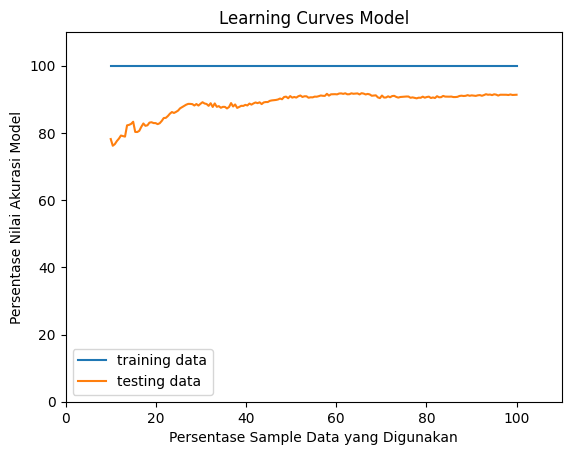

In [69]:
persentase_jumlah_data = np.linspace(0.1, 1, 200)

learning_curves_train = []
learning_curves_test  = []

for persentase in persentase_jumlah_data:
    X_train_subset = X_train[0 : int(len(X_train) * persentase)]
    y_train_subset = y_train[0 : int(len(y_train) * persentase)]

    X_test_subset = X_test[0 : int(len(X_test) * persentase)]
    y_test_subset = y_test[0 : int(len(y_test) * persentase)]

    model_3_docs.fit(X_train_subset, y_train_subset)

    score = model_3_docs.score(X_train_subset, y_train_subset)
    learning_curves_train.append(score)

    score = model_3_docs.score(X_test_subset, y_test_subset)
    learning_curves_test.append(score)

plt.plot(persentase_jumlah_data * 100, np.array(learning_curves_train) * 100, label = 'training data')
plt.plot(persentase_jumlah_data * 100, np.array(learning_curves_test) * 100, label = 'testing data')
plt.legend()
plt.xlabel('Persentase Sample Data yang Digunakan')
plt.ylabel('Persentase Nilai Akurasi Model')
plt.title('Learning Curves Model')
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.show()

Terlihat bahwa seiring dengan banyaknya sample data yang digunakan, learning curves dari training data dan testing data semakin berdekatan dengan akurasi sekitar 90%. Ini mengindikasikan bahwa model yang digunakan mendekati Good Fit.

### Evaluasi dengan Mean Absolute Error (MAE)

Selanjutnya untuk melakukan evaluasi dengan MAE, dapat mengeksekusi perintah di bawah ini.

In [85]:
y_pred = model_3_docs.predict(X_test)

mean_absolute_error(y_test, y_pred)

14291.657328767124

Didapat nilai MAE sekitar 14300 yang mana hasil tersebut lebih kecil dari hasil sebelumnya pada `model_1` yaitu sekitar 24800. Dapat dikatakan bahwa performa model mengalami peningkatan dan hasil prediksi dari model lebih dapat dipercaya karena telah dilakukan 3 kali Cross Validation. Dengan model yang baru dapat diinterpretasikan dengan "Secara rata-rata, nilai `SalePrice` hasil prediksi memiliki selisih (error) terhadap nilai sebenarnya sebesar kurang lebih 14300".

### Evaluasi dengan Coefficient of Determination ($R^2$ Score)

Terakhir untuk melakukan evaluasi dengan $R^2$ Score, dapat mengeksekusi perintah di bawah ini.

In [86]:
y_pred = model_3_docs.predict(X_test)
r2_score(y_test, y_pred)

0.9151466657508682

Didapat nilai $R^2$ Score adalah sekitar 0.92 atau 92% yang mana hasil tersebut lebih besar dari hasil sebelumnya pada `model_1` yaitu sekitar 0.76 atau 76%. Dapat dikatakan bahwa performa model mengalami peningkatan dan hasil prediksi dari model lebih dapat dipercaya karena telah dilakukan 3 kali Cross Validation. Dengan model yang baru dapat diinterpretasikan dengan "Model mampu melakukan prediksi terhadap nilai sebenarnya dari `SalePrice` dengan ketepatan sekitar 92%".